# Sentiment Analysis using Tensor flow

Nepali Dataset: https://github.com/oya163/nepali-sentiment-analysis/tree/master/data/nepcls/csv


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/ss_ac_at_txt_unbal.csv', header=None)

In [ ]:
df.columns = ["sentiment", "category","summary","text"]
df.head()

# 0: +ve
# 1: -ve

,sentiment,category,summary,text
0,0,GENERAL,जोगाउन को लागि,गुठी विधेक ल्याएर ठमेल मा राज गुठि को जग्गा मा...
1,1,GENERAL,लखेटनु पछ,दले ले देश सकेछन सबै बेचे र खान सुरू गरेछन अब ...
2,1,GENERAL,ससकृती ध्वस्त पार्ने,नेपाल को ससकृती ध्वस्त पार्ने योजना हो यो !
3,1,GENERAL,भुमाफिया,मठ मन्दिर गुम्बा का जग्गा हरु मा भुमाफिया को न...
4,1,GENERAL,बेची सके,नेपाल का कल कर्खाना र नदि नाला बेची सके अब मठ ...


The next thing we need to do is to convert the labels and reviews to NumPy arrays as pre-processing methods favor arrays instead of pandas series:

In [ ]:
sentences = df['text'].to_numpy()
labels = df['sentiment'].to_numpy()

Before any pre-processing, we need to split our dataset into training and test instances so that we can evaluate the accuracy of the trained model using the test dataset. We will use a 75:25 split for training and testing data, respectively:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.25)
print("Training Data Input Shape: ", X_train.shape)
print("Training Data Output Shape: ", y_train.shape)
print("Testing Data Input Shape: ", X_test.shape)
print("Testing Data Output Shape: ", y_test.shape)

Training Data Input Shape:  (3026,)
Training Data Output Shape:  (3026,)
Testing Data Input Shape:  (1009,)
Testing Data Output Shape:  (1009,)


To build a mathematical model, we need to convert textual data (reviews) into numeric values. For most of the NLP tasks, tokenization is performed on the entire text corpus which basically includes all the training data reviews in our scenario.

During tokenization, sentences are tokenized into a set of individual words and then statistical features are calculated for each word such as:

**word_counts:** Represents the dictionary of words along with the word count in the entire text corpus

**word_docs:** Represents the dictionary of words depicting the number of documents in the text corpus containing a specific word

**word_index:** A unique index assigned to a dictionary of words

**document_count:** Represents the number of documents used for fitting the tokenizer

To perform the tokenization of training data, we need to specify the vocabulary size which indicates the number of words having a maximum frequency count.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
vocab_size = 10000
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

Here, we will consider only the first `10000` words based on their frequency in the entire training data. Also, we have specified `oov_tok` as `<OOV>` which will replace any unknown word in the text corpus.

Out Of Vocab: OOV

Once we have defined the hyperparameters for `Tokenizer()`, we need to fit them on the training data using `fit_on_texts()`

In [ ]:
tokenizer.fit_on_texts(X_train)
print("Number of Documents: ", tokenizer.document_count)
print("Number of Words: ", tokenizer.num_words)

Number of Documents:  3026
Number of Words:  10000


We can also visualize the count of each word in the overall dictionary as well as the number of documents containing a specific word:

In [ ]:
tokenizer.word_counts

Once we have tokenized the entire text corpus, we need to convert each textual review into a numerical sequence using the fitted tokenizer:

In [ ]:
train_sequences = tokenizer.texts_to_sequences(X_train)
print(f"Text = {X_train[2]} ==> seq= {train_sequences[2]}")

Text = पोखरेल को भाइ त ठिक छैन खायो अनि नेता ले गर्दैन भनु पोखरेल लाई लाज छैन । ==> seq= [215, 2, 457, 17, 92, 29, 1464, 43, 15, 5, 1465, 2670, 215, 4, 130, 29, 3]


Each review in the training data is now converted into a numerical sequence which can be fed into a mathematical model for further training purposes.

However, the text in each review has different lengths of words and will produce a diverse numeric sequence length from the other reviews.

So, we need to limit the sequence lengths to a constant value for each review. We will specify a nominal sequence length of **200** for each review.

The numerical sequences having lengths greater than 200 will be truncated at the end, whereas the ones having lengths smaller than 200 will be padded with zeros at the end. We can now specify the sequence padding for numerical sequences of textual reviews:

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sequence_length = 200
train_padded = pad_sequences(train_sequences, maxlen=sequence_length, padding='post', truncating='post')
train_padded[2]

array([ 215,    2,  457,   17,   92,   29, 1464,   43,   15,    5, 1465,
       2670,  215,    4,  130,   29,    3,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=sequence_length, padding='post', truncating='post')

With tokenization, sequence conversion, and padding, we are now done with the pre-processing of the textual reviews.

Let’s now advance to building the actual LSTM model for sentiment analysis.

## Sentiment Analysis using LSTM

LSTM model consists of multiple layers, each one taking input from the previous one and advancing output to the next one. The first layer takes the numerical sequences as input, and the last layer gives the prediction label as the output.

We can define a sequential () model to embed the layers of LSTM. Later, we can add as many layers as we want in this sequential model:


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional

In [ ]:
model = Sequential()

Firstly, we will add an embedding layer which will convert each word into a dense vector of embedding dimensions specified in the hyperparameters of the layer:

In [ ]:
embedding_dim = 16
model.add(Embedding(vocab_size, embedding_dim, input_length=sequence_length))

Here we have specified the vocabulary size as well as the sequence length of each review. Next, we need to specify the Bidirectional() layer and the LSTM layer with a specified unit size in the LSTM layer:

In [ ]:
lstm_out = 32
model.add(Bidirectional(LSTM(lstm_out)))

One advantage of using **bidirectional LSTM** is that it remembers output from past to future as well as from future to past. This technique can result in more robust models for time series analysis.

Next, we will specify a fully connected layer having **10 units and ‘relu’** activation:

In [ ]:
model.add(Dense(10, activation='relu'))

Finally, we will add an **output layer** having only 1 unit and **‘sigmoid’** activation. This layer will output the probability that an input belongs to 1 (or positive) using the **sigmoid filter**.

https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

In [ ]:
model.add(Dense(1, activation='sigmoid'))

Now we need to compile the model such that the model optimizes the `binary_crossentropy` during training. The loss value is the parameter that the `adam` optimizer will minimize by tweaking the weights during the training phase.

Essentially, the `adam` optimizer tries to find the global minima for the loss value among all the local minima by optimizing the trainable parameters.

Moreover, the `accuracy` of the model will be reported for each training batch/epoch to gauge the convergence of the neural network.

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173205 (676.58 KB)
Trainable params: 173205 (676.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Before the training, we need to specify the number of epochs for which the network needs to be trained. Obviously, we are not sure about the magic number and we tend to take an educated guess.

Let’s just say that we specified the number of epochs to be 10 whereas our model was converged to minimum validation loss after 2 epochs. The remaining 8 epochs will only tend to overfit the model on the training data. So, how will we avoid this situation?

It’s simple… You specify the callback for `EarlyStopping()`, which will halt the model training after the model fails to minimize the validation loss value after the stated no. of epochs in the callback parameters.
\
```
checkpoint_filepath = os.getcwd()
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_loss', mode='min', save_best_only=True)
callbacks = [EarlyStopping(patience=2), model_checkpoint_callback]
```

Along with the callback for `EarlyStopping()`, you can specify the `ModelCheckpoint()` to monitor the loss after each epoch and save the best model in terms of validation loss.

Now, we will **fit** our model on the training data for a maximum of **10 epochs**.

Since we have specified the callback to monitor the loss on the validation dataset, we need to specify the validation data as well. If the validation loss of the model is not minimized for two consecutive epochs, the training of the model will halt as specified in the callback.

In [ ]:
history = model.fit(train_padded, y_train, epochs=10, validation_data=(test_padded, y_test), callbacks=[])

Epoch 1/10
95/95 [==============================] - 19s 157ms/step - loss: 0.6839 - accuracy: 0.5615 - val_loss: 0.6587 - val_accuracy: 0.6967
Epoch 2/10
95/95 [==============================] - 13s 141ms/step - loss: 0.5777 - accuracy: 0.7399 - val_loss: 0.5738 - val_accuracy: 0.7156
Epoch 3/10
95/95 [==============================] - 14s 143ms/step - loss: 0.4261 - accuracy: 0.8136 - val_loss: 0.6106 - val_accuracy: 0.7066
Epoch 4/10
95/95 [==============================] - 14s 143ms/step - loss: 0.3243 - accuracy: 0.8602 - val_loss: 0.6650 - val_accuracy: 0.6908
Epoch 5/10
95/95 [==============================] - 15s 153ms/step - loss: 0.2616 - accuracy: 0.8771 - val_loss: 0.7331 - val_accuracy: 0.6858
Epoch 6/10
95/95 [==============================] - 13s 138ms/step - loss: 0.2302 - accuracy: 0.8870 - val_loss: 0.7404 - val_accuracy: 0.6660
Epoch 7/10
95/95 [==============================] - 13s 138ms/step - loss: 0.2070 - accuracy: 0.8933 - val_loss: 0.8850 - val_accuracy: 0.6779

Since we saved the model params in the `history` variable, we can visualize the training/testing data loss and accuracy:

In [ ]:
metrics_df = pd.DataFrame(history.history)
print(metrics_df)

       loss  accuracy  val_loss  val_accuracy
0  0.683926  0.561467  0.658749      0.696729
1  0.577742  0.739921  0.573786      0.715560
2  0.426148  0.813615  0.610632      0.706640
3  0.324301  0.860211  0.664976      0.690783
4  0.261605  0.877065  0.733063      0.685828
5  0.230223  0.886980  0.740399      0.666006
6  0.206977  0.893258  0.884996      0.677899
7  0.195110  0.888962  0.901830      0.666997
8  0.185054  0.890945  1.005403      0.683845
9  0.179333  0.894911  0.900059      0.665015


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

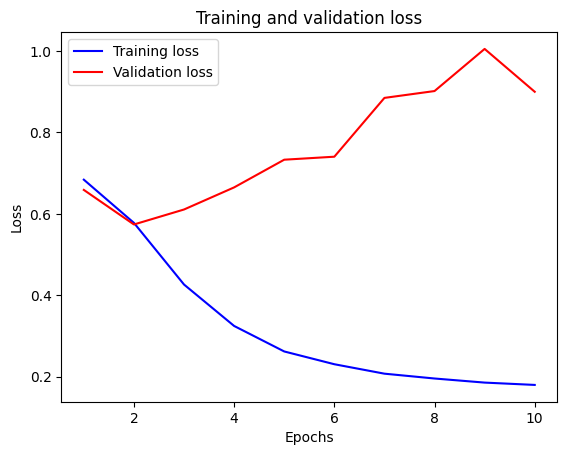

In [ ]:
plt.plot(epochs, loss, 'b', label='Training loss')
# r is for "solid red line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

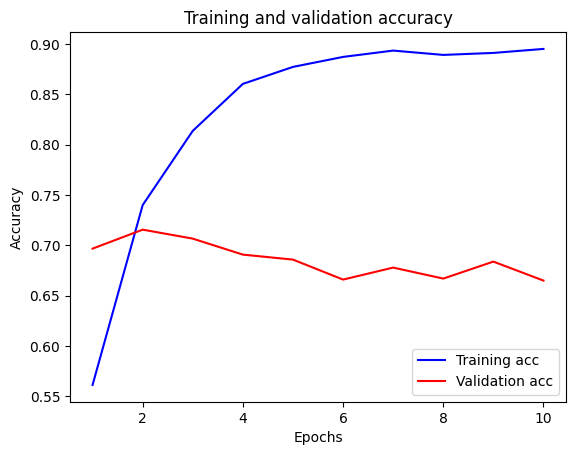

In [ ]:
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## prediction

In [ ]:
# pred_input = pd.DataFrame([[
#   "मलाई मेरो देश राम्रो लाग्छ",
#   "यो गेम राम्रो छैन"
# ]])
# pred_input = pred_input.to_numpy()

pred_input = np.array( ["मलाई मेरो देश राम्रो लाग्छ",  "यो गेम राम्रो छैन"] )
pred_input

array(['मलाई मेरो देश राम्रो लाग्छ', 'यो गेम राम्रो छैन'], dtype='<U26')

In [ ]:
print(pred_input)

['मलाई मेरो देश राम्रो लाग्छ' 'यो गेम राम्रो छैन']


In [ ]:
# test_sequences = tokenizer.texts_to_sequences(X_test)
# test_padded = pad_sequences(test_sequences, maxlen=sequence_length, padding='post', truncating='post')

pred_sequences = tokenizer.texts_to_sequences(pred_input)
pred_padded = pad_sequences(pred_sequences, maxlen=sequence_length, padding='post', truncating='post')

In [ ]:
         # 0: +ve
# 1: -ve
model.predict(pred_padded)

1/1 [==============================] - 0s 32ms/step


array([[0.04185771],
       [0.16846283]], dtype=float32)